Primer modelo utilizando landmarks que no coincidian con el orden (fallo completamente)

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from natsort import natsorted

2023-11-24 18:57:03.316551: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 18:57:03.346579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load path

data_path = '/home/alanr/Documents/Corazon/Data/'

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-11-24 18:57:04.666955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 18:57:04.693143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 18:57:04.693326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
#Load landmarks

def load_data(data_dir):
    data = {}  # Use a dictionary to store images with the same x value
    filenames = natsorted(os.listdir(data_dir))
    for filename in filenames:
        if filename.startswith("erode_"):
            x, y = extract_xy_from_filename(filename)
            image = cv2.imread(os.path.join(data_dir, filename), cv2.IMREAD_GRAYSCALE)

            if x not in data:
                data[x] = {}
            data[x][y] = image

    # Convert the dictionary to a numpy array
    images_array = np.array([[data[x][y] for y in range(7)] for x in sorted(data.keys())])

    return images_array

def extract_xy_from_filename(filename):
    # Extract x and y values from the filename
    print(filename)
    parts = filename.split('_')
    x = int(parts[1])
    y = int(parts[3].split('.')[0])  # Remove the file extension and convert to int
    return x, y


# Example usage
data_dir = data_path + "heatmaps"
landmarks_array = load_data(data_dir)
print(landmarks_array.shape)  # This should print the shape of your resulting array


erode_1_heatmap_0.png
erode_1_heatmap_1.png
erode_1_heatmap_2.png
erode_1_heatmap_3.png
erode_1_heatmap_4.png
erode_1_heatmap_5.png
erode_1_heatmap_6.png
erode_2_heatmap_0.png
erode_2_heatmap_1.png
erode_2_heatmap_2.png
erode_2_heatmap_3.png
erode_2_heatmap_4.png
erode_2_heatmap_5.png
erode_2_heatmap_6.png
erode_3_heatmap_0.png
erode_3_heatmap_1.png
erode_3_heatmap_2.png
erode_3_heatmap_3.png
erode_3_heatmap_4.png
erode_3_heatmap_5.png
erode_3_heatmap_6.png
erode_4_heatmap_0.png
erode_4_heatmap_1.png
erode_4_heatmap_2.png
erode_4_heatmap_3.png
erode_4_heatmap_4.png
erode_4_heatmap_5.png
erode_4_heatmap_6.png
erode_5_heatmap_0.png
erode_5_heatmap_1.png
erode_5_heatmap_2.png
erode_5_heatmap_3.png
erode_5_heatmap_4.png
erode_5_heatmap_5.png
erode_5_heatmap_6.png
erode_6_heatmap_0.png
erode_6_heatmap_1.png
erode_6_heatmap_2.png
erode_6_heatmap_3.png
erode_6_heatmap_4.png
erode_6_heatmap_5.png
erode_6_heatmap_6.png
erode_7_heatmap_0.png
erode_7_heatmap_1.png
erode_7_heatmap_2.png
erode_7_he

In [5]:
# Errors
import os

# Specify the directory path
original_directory_path = data_path + 'heatmaps'


# List all the files in the directory
original_files_list = os.listdir(original_directory_path)




original_files = [file for file in original_files_list if os.path.isfile(os.path.join(original_directory_path, file))]

# Count the number of files

number_of_original_files = len(original_files)

print(f'number_of_original_files: {number_of_original_files} %')

number_of_original_files: 2051 %


In [6]:
# Carga las imágenes en escala de grises de un solo canal
def load_data(data_dir):
    images = []

    # Get a list of filenames and sort them
    filenames = natsorted(os.listdir(data_dir))

    for filename in filenames:
      if filename.startswith("frame_"):
            image = cv2.imread(os.path.join(data_dir, filename), cv2.IMREAD_GRAYSCALE)
            print(filename)
            images.append(image)
    return np.array(images)

# Example usage
data_dir = data_path + "frames_landmarks"
images_array = load_data(data_dir)
print(images_array.shape)  # This should print the shape of your resulting array

frame_1.png
frame_2.png
frame_3.png
frame_4.png
frame_5.png
frame_6.png
frame_7.png
frame_8.png
frame_9.png
frame_10.png
frame_11.png
frame_12.png
frame_13.png
frame_14.png
frame_15.png
frame_16.png
frame_17.png
frame_18.png
frame_19.png
frame_20.png
frame_21.png
frame_22.png
frame_23.png
frame_24.png
frame_25.png
frame_26.png
frame_27.png
frame_28.png
frame_29.png
frame_30.png
frame_31.png
frame_32.png
frame_33.png
frame_34.png
frame_35.png
frame_36.png
frame_37.png
frame_38.png
frame_39.png
frame_40.png
frame_41.png
frame_42.png
frame_43.png
frame_44.png
frame_45.png
frame_46.png
frame_47.png
frame_48.png
frame_50.png
frame_51.png
frame_52.png
frame_53.png
frame_54.png
frame_55.png
frame_56.png
frame_57.png
frame_58.png
frame_59.png
frame_60.png
frame_61.png
frame_62.png
frame_63.png
frame_64.png
frame_65.png
frame_66.png
frame_67.png
frame_68.png
frame_69.png
frame_70.png
frame_71.png
frame_73.png
frame_74.png
frame_75.png
frame_76.png
frame_77.png
frame_78.png
frame_79.png
frame_80

In [7]:
# Get the length of the images and masks arrays
batch_size = 293
# Resize
images_array = images_array[:batch_size]
landmarks_array = landmarks_array[:batch_size]

print("Number of images:", images_array.shape)
print("Number of landmarks:", landmarks_array.shape)

Number of images: (293, 112, 112)
Number of landmarks: (293, 7, 112, 112)


Successfully exported the array to first_image2.txt


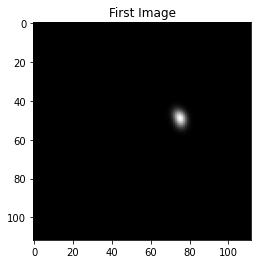

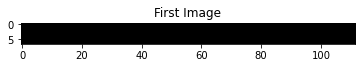

In [8]:
import matplotlib.pyplot as plt

# Assuming your array is named 'my_array'
first_image = landmarks_array[0][1]  # Selecting the first image from the first item
# Save the array to a text file
file_path = 'first_image2.txt'
np.savetxt(file_path, first_image, fmt='%f', delimiter='\t')

print(f"Successfully exported the array to {file_path}")
# Assuming each channel contains grayscale information
plt.imshow(first_image, cmap='gray')
plt.title('First Image')
plt.show()
plt.imshow(landmarks_array[0,:,:,0], cmap='gray')
plt.title('First Image')
plt.show()


In [9]:


# Define the UNet model for landmarks
def unet_landmarks_model(input_shape, num_landmarks):
    inputs = Input(input_shape + (1,))  # Add a channel dimension

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv3], axis=-1)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv2], axis=-1)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv1], axis=-1)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    output = Conv2D(num_landmarks, 1, activation='sigmoid')(conv7)  # Output with num_landmarks channels for landmarks

    model = Model(inputs=inputs, outputs=output)
    return model

# Define the loss function (mean squared error) for landmarks
optimizer = Adam(learning_rate=0.001)
def compile_landmarks_model(model):
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mse'])


# Convert lists to numpy arrays
images_array = np.array(images_array)

# Convert lists to numpy arrays
landmarks_array = np.array(landmarks_array)

# Normalize landmarks to [0, 1]
landmarks_array = landmarks_array / 255.0
images_array = images_array / 255.0
print(landmarks_array.shape)
# Transpose dimensions for landmarks
landmarks_array = np.transpose(landmarks_array, (0, 2, 3, 1))
print(landmarks_array.shape)

# Dividing data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images_array, landmarks_array, test_size=0.2, random_state=42)

# Set the number of landmarks
num_landmarks = 7

# Create the UNet model for landmarks
landmarks_model = unet_landmarks_model( (112, 112), num_landmarks,)

# Compile the model for landmarks
compile_landmarks_model(landmarks_model)

# Ensure the correct shape of y_train
#y_train = np.transpose(y_train, (0, 1, 3, 2))  # Swap the last two dimensions

# Train the model on the training set
history = landmarks_model.fit(X_train, y_train, batch_size=8, epochs=50, validation_split=0.2)


2023-11-24 18:57:05.504321: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 18:57:05.504555: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 18:57:05.504689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

(293, 7, 112, 112)
(293, 112, 112, 7)
Epoch 1/50


2023-11-24 18:57:07.078122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-11-24 18:57:08.159041: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563e491953f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-24 18:57:08.159070: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-24 18:57:08.173273: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-24 18:57:08.329665: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-24 18:57:09.497456: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.56GiB with freed_by_count=

24/24 [==============================] - ETA: 0s - loss: 0.0264 - mse: 0.0264

2023-11-24 18:57:18.520607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


24/24 [==============================] - 13s 226ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 4/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 6/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/50
24/24 [==============================] - 2s 103ms/step - loss: 0.0016 - mse

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

from sklearn.metrics import f1_score

# Obtén las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Aplica un umbral a las imágenes de máscaras
threshold = 0.5  # Ajusta el umbral según tus necesidades
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calcula el coeficiente de Dice
dice_score = f1_score(y_test_binary.flatten(), y_pred_binary.flatten())

print(f'Dice Score: {dice_score}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label = 'Training acc')
plt.plot(val_acc, label = 'Validation acc')

plt.legend()
plt.grid(alpha=0.2)

random_indices [36, 9, 18, 3, 1, 58, 13, 14, 41, 55, 0, 39, 15, 49, 43, 16, 33, 27, 17, 23]
1/1 [==============================] - 1s 801ms/step
len (20, 112, 112, 7)
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predicted): 0
Number of non-black pixels (predict

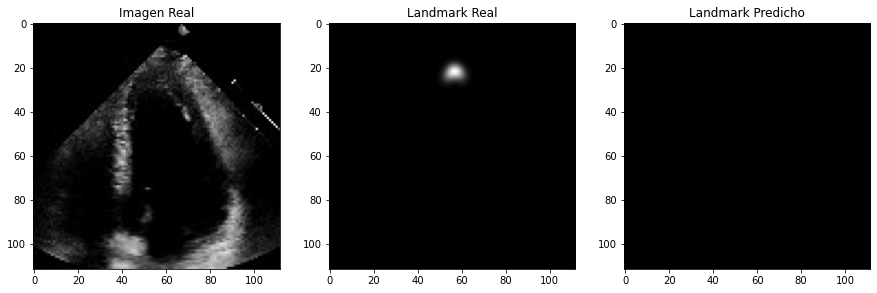

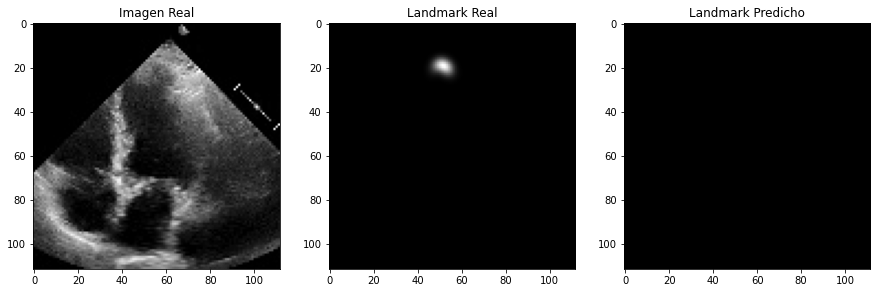

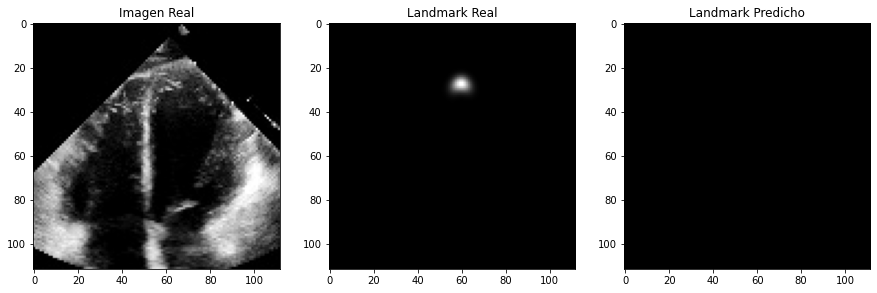

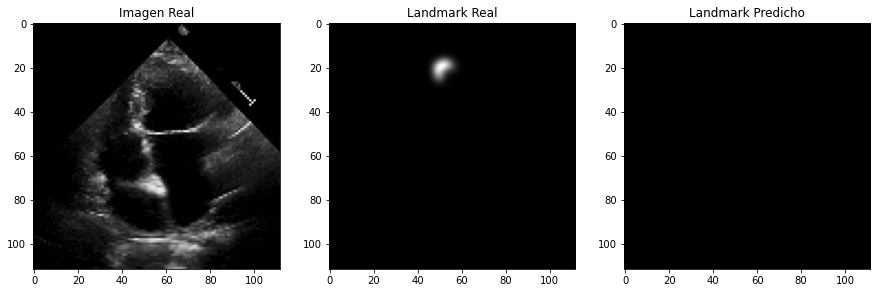

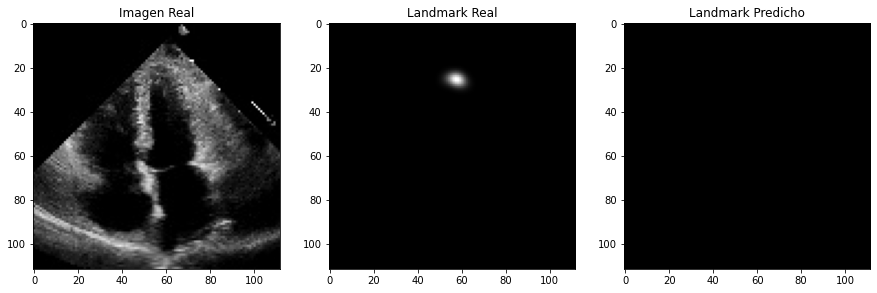

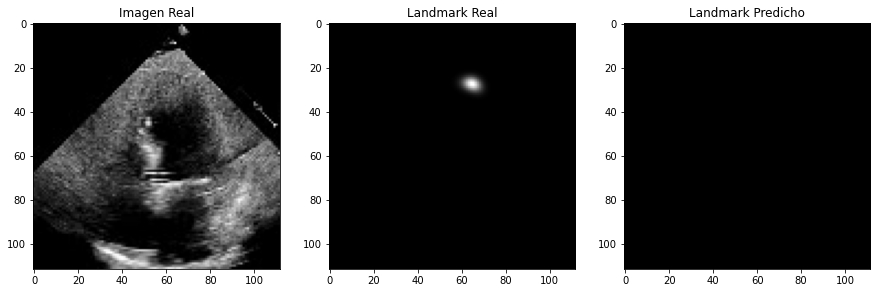

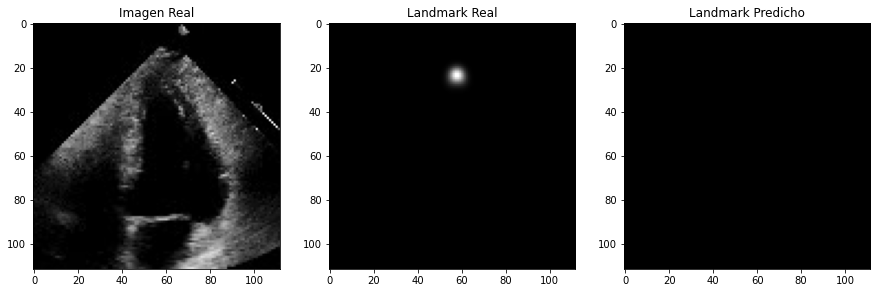

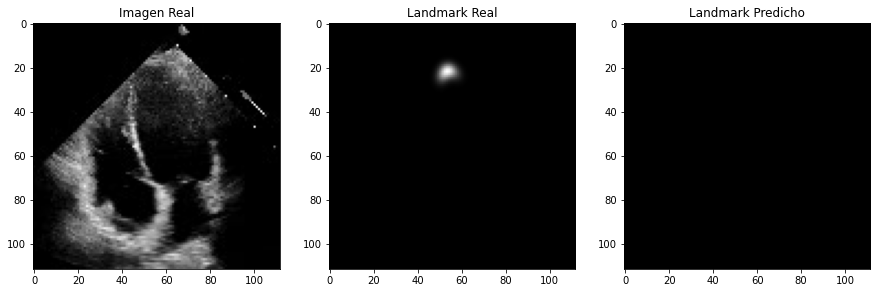

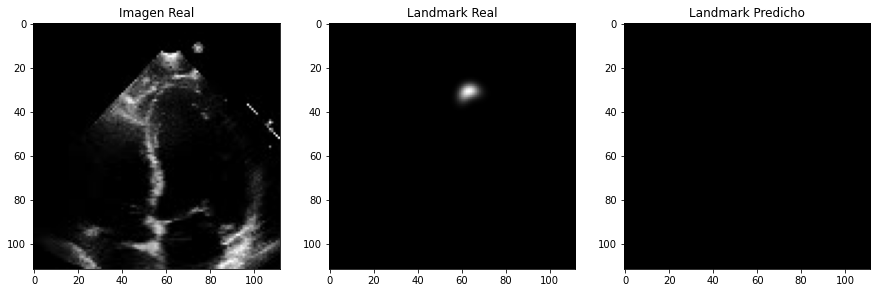

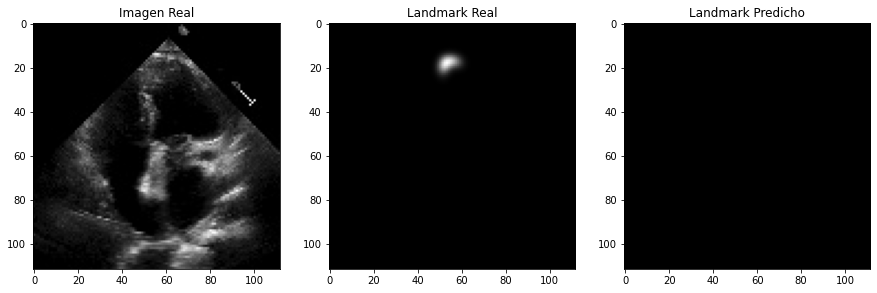

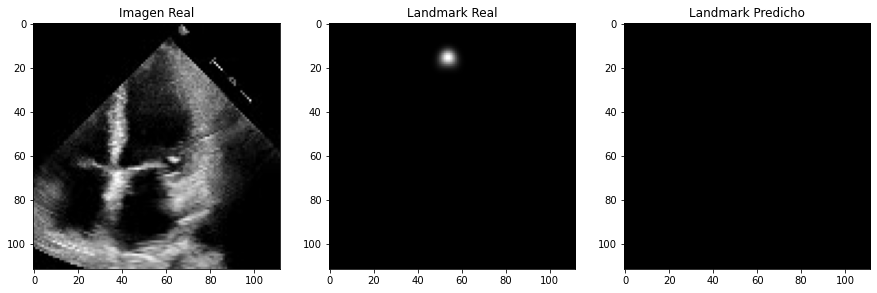

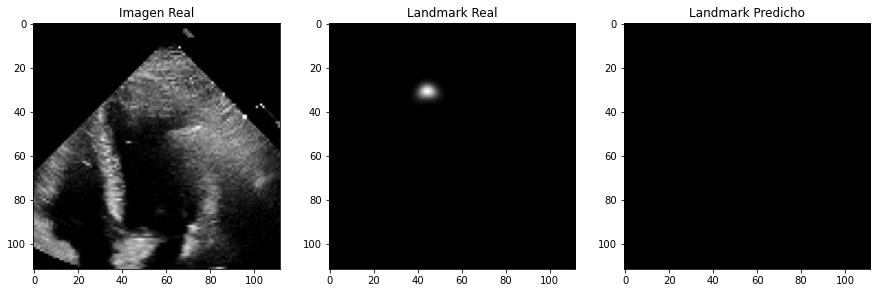

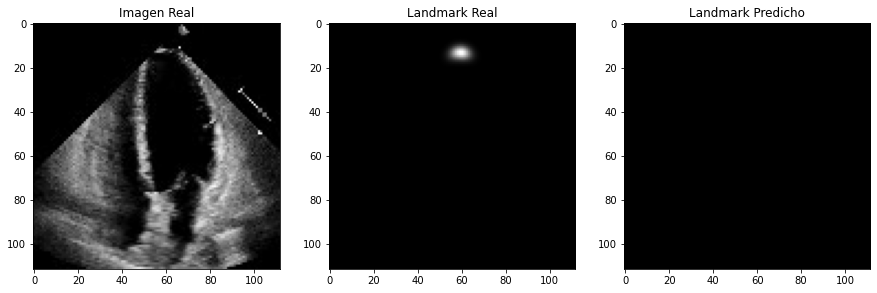

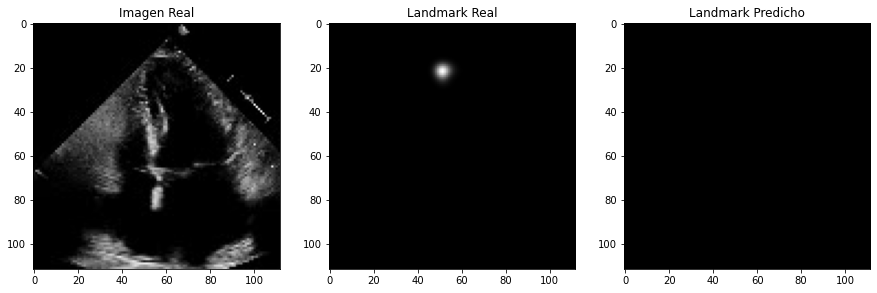

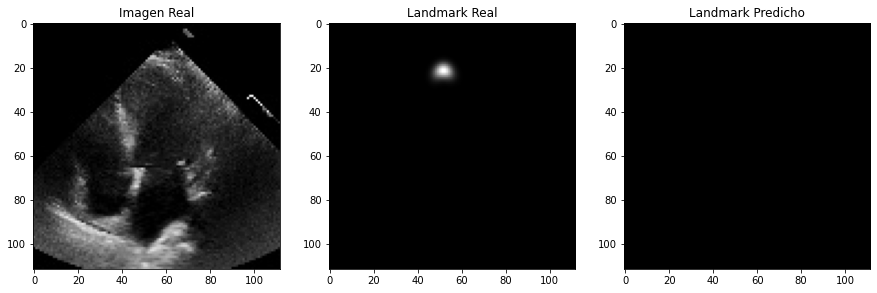

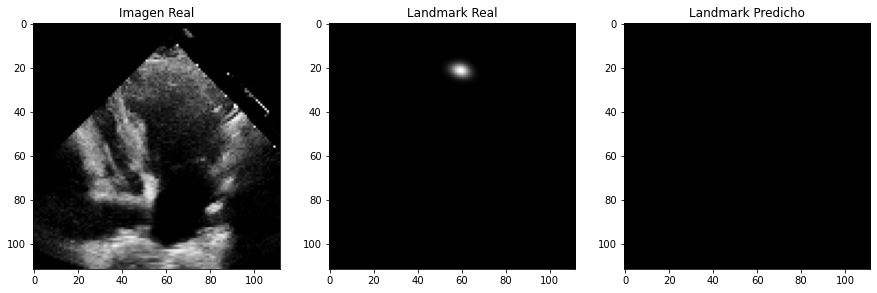

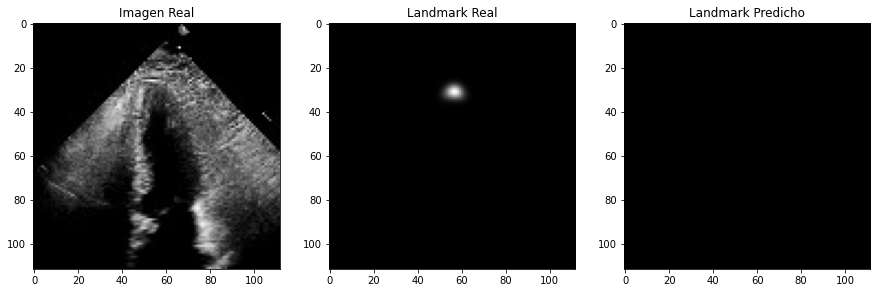

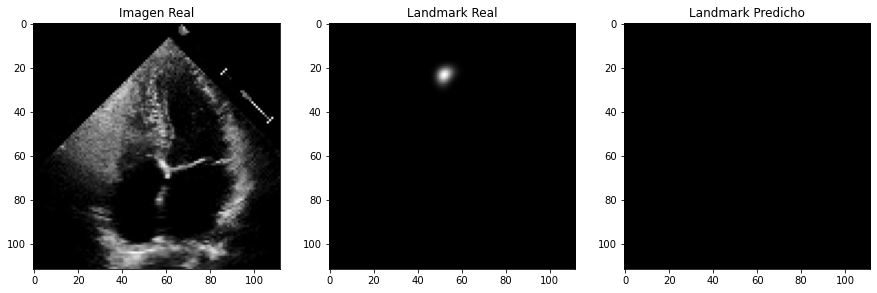

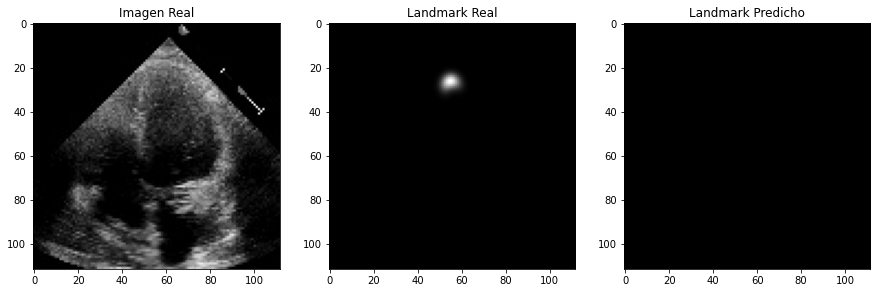

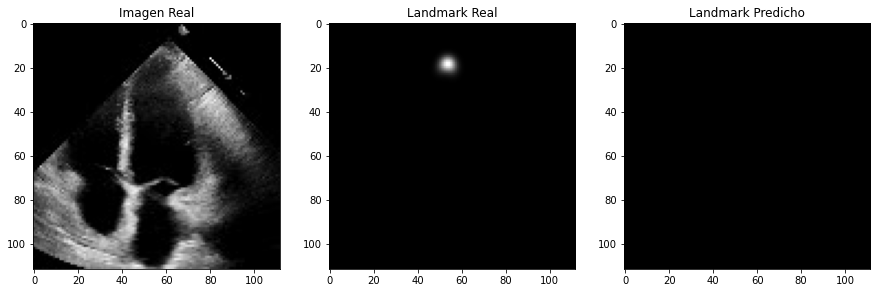

In [14]:
import random
import matplotlib.pyplot as plt

def count_non_black_pixels(image, is_rgb=False):
    if is_rgb:
        # Count non-black pixels in RGB image
        non_black_pixels = np.sum((image != [0, 0, 0]).all(axis=-1))
    else:
        # Count non-black pixels in grayscale image
        non_black_pixels = np.sum(image != 0)

    return non_black_pixels

# Example usage



# Example usage
num_examples_to_show = 20
random_indices = random.sample(range(len(X_test)), num_examples_to_show)
print('random_indices', random_indices)
# Predice las máscaras para los ejemplos seleccionados
predicted_masks = landmarks_model.predict(X_test[random_indices])
print('len', predicted_masks.shape)

for i in range(num_examples_to_show):
    plt.figure(figsize=(15, 5))

    # Imagen real
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[random_indices[i]].squeeze(), cmap='gray')
    plt.title('Imagen Real')

    # Máscara real (Selecciona una de las 7 máscaras, por ejemplo, la primera)
    plt.subplot(1, 3, 2)
    plt.imshow(y_test[random_indices[i]][:, :, 0].squeeze(), cmap='gray')
    plt.title('Landmark Real')

    # Máscara predicha (Selecciona una de las 7 máscaras predichas, por ejemplo, la primera)
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i][:, :, 0].squeeze(), cmap='gray')
    plt.title('Landmark Predicho')

    result_w_pixels = count_non_black_pixels(predicted_masks[i][:, :, 0], is_rgb=False)
    print(f"Number of non-black pixels (predicted): {result_w_pixels}")
    

# Print the total count after the loop


# Move plt.show() outside the loop
plt.show()



In [15]:
total_non_black_pixels = 0

for i in range(num_examples_to_show):
    for j in range(7):
        total_non_black_pixels += count_non_black_pixels(predicted_masks[i][:, :, j], is_rgb=False)

print('total_non_black_pixels', total_non_black_pixels)

total_non_black_pixels 0


In [12]:
file_path = 'first_image3.txt'
np.savetxt(file_path, y_test[random_indices[0]][:, :, 0], fmt='%f', delimiter='\t')

In [13]:
# Genera máscaras para nuevas imágenes de prueba (por ejemplo, la primera imagen de prueba)
predicted_masks = model.predict(images)

# Visualiza la imagen original, la máscara real y la máscara generada
index = 10  # Cambia el índice para ver diferentes ejemplos
plt.figure(figsize=(12, 4))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(X_test[index].squeeze(), cmap='gray')
plt.title("Imagen Original")

# Máscara real
plt.subplot(1, 3, 2)
plt.imshow(y_test[index].squeeze(), cmap='gray')
plt.title("Máscara Real")

# Máscara generada
plt.subplot(1, 3, 3)
plt.imshow(predicted_masks[index].squeeze(), cmap='gray')
plt.title("Máscara Generada")

plt.show()

NameError: name 'model' is not defined

In [ ]:
# Ruta de la carpeta donde guardarás las máscaras generadas
output_dir = "/content/drive/Shareddrives/Penta Tech/EchoNet-Dynamic/output_masks"

In [ ]:
# Crea la carpeta de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
# Carga las imágenes y máscaras en escala de grises de un solo canal
X, y = load_data(data_dir)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crea el modelo U-Net
model = unet_model(input_shape=(112, 112, 1))  # Imágenes en escala de grises de 112x112 píxeles

In [ ]:
# Compila el modelo
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Imprime un resumen del modelo
model.summary()

In [ ]:
# Verifica la forma de los datos de entrenamiento
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

In [ ]:
# Entrena el modelo
# model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))